In [8]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('penguins (1).csv' ,encoding='windows-1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ï»¿culmen_length_mm  342 non-null    float64
 1   culmen_depth_mm      342 non-null    float64
 2   flipper_length_mm    342 non-null    float64
 3   body_mass_g          342 non-null    float64
 4   sex                  335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [9]:
df.dropna( axis=0, how="all")

,ï»¿culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


C:\Users\csorensen\AppData\Local\Temp\ipykernel_3744\173153303.py:12: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


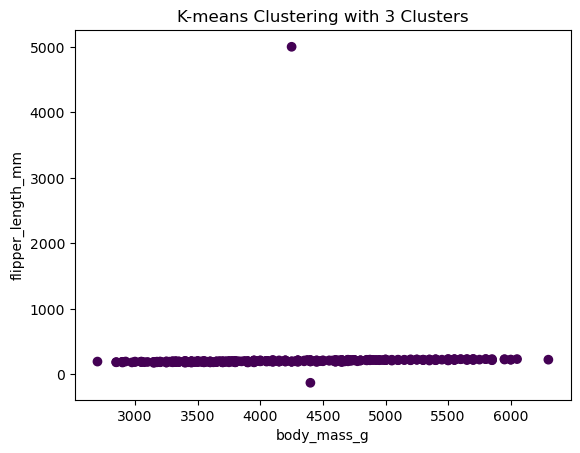

In [14]:
# Step 1: Define K-means functions (same as before)
def initialize_centroids(X, k):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(len(X), size=k, replace=False)
    return X[random_indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def has_converged(centroids, new_centroids, tolerance=1e-4):
    return np.all(np.linalg.norm(centroids - new_centroids, axis=1) < tolerance)

def kmeans(X, k, max_iterations=300, tolerance=1e-4):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iterations):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        
        if has_converged(centroids, new_centroids, tolerance):
            break
        
        centroids = new_centroids
    
    return centroids, labels
X = df[[ 'body_mass_g',"flipper_length_mm"]].values  # Selecting columns you want to use for clustering

# Step 4: Apply K-means clustering
k = 3  # Number of clusters
centroids, labels = kmeans(X, k)

# Step 5: Add cluster labels to the DataFrame (optional)
df['Cluster'] = labels

# Step 6: Visualize the result (only works well for 2D data)
plt.scatter(df['body_mass_g'],df["flipper_length_mm"], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title(f"K-means Clustering with {k} Clusters")
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.show()

In [18]:
x2 = random_state=42

In [19]:
print(x2)

42
